In [ ]:
######################## Theory questions ######################

### 1. What is a Decision Tree, and how does it work?

A Decision Tree is a flowchart-like structure used in machine learning for both classification and regression tasks. It splits the dataset into subsets based on the value of input features. Each internal node represents a decision rule on a feature, each branch represents an outcome of the decision, and each leaf node represents a predicted result. The tree continues to split until a stopping condition is met such as maximum depth, minimum samples per leaf, or no further information gain.

### 2. What are impurity measures in Decision Trees?

Impurity measures quantify the level of disorder or impurity in a dataset at a node. These are used to decide the best feature and threshold to split the data. Common impurity measures include:
- **Gini Impurity**: Measures the probability of a wrong classification.
- **Entropy**: Measures the level of randomness or disorder.
- **Classification Error**: Measures the frequency of the most common label.

### 3. What is the mathematical formula for Gini Impurity?

The formula for Gini Impurity is: **Gini = 1 - Σ(p_i)^2**
where p_i is the proportion of class i instances in the node.

### 4. What is the mathematical formula for Entropy?

The formula for Entropy is: **Entropy = - Σ(p_i * log₂(p_i))**
where p_i is the probability of class i in the node. It reaches maximum when all classes are equally likely.

### 5. What is Information Gain, and how is it used in Decision Trees?

Information Gain is the decrease in entropy or impurity after a dataset is split on an attribute. It helps the algorithm select the best feature. It is calculated as: **Information Gain = Entropy(parent) - [Weighted average] * Entropy(children)**.

### 6. What is the difference between Gini Impurity and Entropy?

Both are measures of impurity used to create splits. Gini is computationally faster and tends to isolate the most frequent class. Entropy comes from information theory and is more sensitive to class distribution changes.

### 7. What is the mathematical explanation behind Decision Trees?

Decision Trees use recursive binary partitioning. At each node, the algorithm chooses the feature and threshold that results in the highest Information Gain or lowest Gini Impurity. This is repeated until a stopping criterion is met.

### 8. What is Pre-Pruning in Decision Trees?

Pre-pruning stops the growth of the tree early to avoid overfitting. It uses constraints such as:
- Maximum depth
- Minimum samples per split
- Minimum impurity decrease

### 9. What is Post-Pruning in Decision Trees?

Post-pruning involves building the full tree and then removing branches that do not provide significant predictive power. This is usually done by validating performance on a separate dataset.

### 10. What is the difference between Pre-Pruning and Post–Pruning?

- **Pre-Pruning**: Stops the tree from growing beyond a set condition.
- **Post-Pruning**: Builds a complete tree and prunes it back.
Pre-pruning can stop useful splits, while post-pruning may recover more generalization by testing performance.

### 11. What is a Decision Tree Regressor?

A Decision Tree Regressor is a variant of decision trees that predicts continuous numerical values. It splits the data into segments with minimal variance and predicts the mean of the target values in each leaf.

### 12. What are the advantages and disadvantages of Decision Trees?

**Advantages:**
- Easy to understand and interpret
- Requires little data preprocessing
- Can handle both categorical and numerical data
**Disadvantages:**
- Prone to overfitting
- Can be unstable to small data variations
- Biased with imbalanced datasets

### 13. How does a Decision Tree handle missing values?

Some implementations (like C4.5) use surrogate splits or probabilistic approaches. Sklearn generally requires preprocessing like imputing missing values before training.

### 14. How does a Decision Tree handle categorical features?

Categorical features can be handled by converting them into binary splits or using one-hot encoding. Sklearn requires them to be encoded numerically before model training.

### 15. What are some real-world applications of Decision Trees?

- Credit Risk Assessment
- Medical Diagnosis
- Fraud Detection
- Customer Churn Prediction
- Loan Approval
- Stock Market Prediction

In [ ]:
######################## Practical questions ######################

### 16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 1.0


### 17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

In [14]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
print("Feature importances:", clf.feature_importances_)# Write your code here

Feature importances: [0.         0.01911002 0.42356658 0.5573234 ]


### 18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

In [15]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


### 19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.5258487964675388


### 20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

In [43]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Step 3: Export the tree structure to DOT format
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Step 4: Render the DOT data using Graphviz
graph = graphviz.Source(dot_data)
graph.render("iris_tree")  # Saves iris_tree.pdf
graph.view()  # Opens the file if system supports it


### 21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target  # This is categorical (0, 1, 2)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Full tree (no depth limit)
clf_full = DecisionTreeClassifier()
clf_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, clf_full.predict(X_test))

# Tree with max depth = 3
clf_limited = DecisionTreeClassifier(max_depth=3)
clf_limited.fit(X_train, y_train)
acc_limited = accuracy_score(y_test, clf_limited.predict(X_test))

# Compare accuracies
print("Full tree accuracy:", acc_full)
print("Depth-limited tree accuracy:", acc_limited)


Full tree accuracy: 1.0
Depth-limited tree accuracy: 1.0


### 22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default Decision Tree Classifier
clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)
acc_default = accuracy_score(y_test, clf_default.predict(X_test))

# Decision Tree with min_samples_split=5
clf_custom = DecisionTreeClassifier(min_samples_split=5)
clf_custom.fit(X_train, y_train)
acc_custom = accuracy_score(y_test, clf_custom.predict(X_test))

# Print and compare accuracies
print("Default tree accuracy:", acc_default)
print("min_samples_split=5 tree accuracy:", acc_custom)


Default tree accuracy: 1.0
min_samples_split=5 tree accuracy: 1.0


### 23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train without feature scaling
clf_unscaled = DecisionTreeClassifier()
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

# 2. Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with scaled features
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))

# Print comparison
print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling   :", acc_scaled)


Accuracy without scaling: 1.0
Accuracy with scaling   : 1.0


### 24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

In [33]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target  # Multiclass: 0, 1, 2

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train using One-vs-Rest with Decision Tree
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = ovr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy using One-vs-Rest Decision Tree:", accuracy)


Accuracy using One-vs-Rest Decision Tree: 1.0


### 25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01911002 0.         0.55727376 0.42361622]


### 26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

In [35]:
reg_full = DecisionTreeRegressor()
reg_full.fit(X_train, y_train)

reg_limited = DecisionTreeRegressor(max_depth=5)
reg_limited.fit(X_train, y_train)

print("MSE full:", mean_squared_error(y_test, reg_full.predict(X_test)))
print("MSE limited:", mean_squared_error(y_test, reg_limited.predict(X_test)))

MSE full: 0.0
MSE limited: 0.0


### 27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

In [36]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    print(f"ccp_alpha: {ccp_alpha:.4f}, Accuracy: {accuracy_score(y_test, clf_pruned.predict(X_test))}")

ccp_alpha: 0.0000, Accuracy: 1.0
ccp_alpha: 0.0092, Accuracy: 1.0
ccp_alpha: 0.0127, Accuracy: 1.0
ccp_alpha: 0.0185, Accuracy: 1.0
ccp_alpha: 0.0397, Accuracy: 1.0
ccp_alpha: 0.2503, Accuracy: 0.7111111111111111
ccp_alpha: 0.3121, Accuracy: 0.28888888888888886


### 28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

In [37]:
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

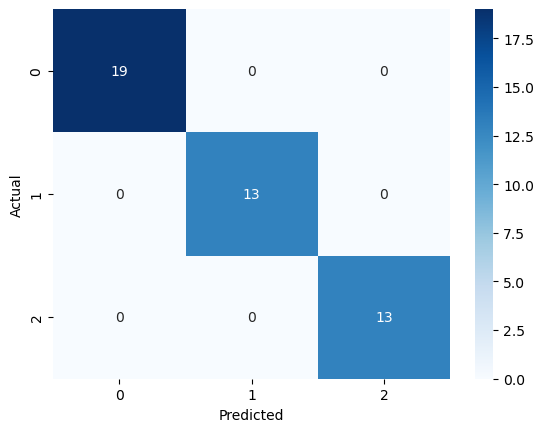

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.9238095238095237
